In [1]:
import tensorflow as tf

### Carga BD con ejemplos de escritura manual

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 29s 3us/step


In [3]:
x_train,x_test=x_train/255,x_test/255

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)    
])

In [11]:
predictions = model(x_train[:1]).numpy()
display(predictions)
print("\ndigit = ", y_train[:1])

array([[-0.6017755 , -0.31380343, -0.13574272, -0.00082827,  0.03253767,
         0.21807435, -0.72137433, -0.5433015 ,  0.1778563 ,  0.12835251]],
      dtype=float32)


digit =  [5]


In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.06207086, 0.08278515, 0.09891979, 0.11320766, 0.11704867,
        0.14091071, 0.055074  , 0.0658086 , 0.13535601, 0.12881853]],
      dtype=float32)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
loss_fn(y_train[:1], predictions).numpy()

1.9596288

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [76]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0591 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0467 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9851


In [16]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0740 - accuracy: 0.9779


[0.07403182238340378, 0.9779000282287598]

In [18]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [19]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.1064153e-10, 1.7246731e-09, 4.8054795e-07, 2.4316285e-04,
        1.0536493e-11, 8.5427479e-07, 9.3443667e-15, 9.9975401e-01,
        5.4726662e-08, 1.4651699e-06],
       [4.3834509e-09, 6.0299280e-06, 9.9998713e-01, 5.2711871e-06,
        1.6815641e-15, 1.0199267e-06, 1.4687541e-07, 3.5841068e-14,
        3.8229058e-07, 9.7414268e-17],
       [1.5883138e-07, 9.9811304e-01, 2.5397807e-04, 1.0041158e-05,
        8.8535075e-05, 4.1987828e-06, 9.9198787e-06, 1.3787462e-03,
        1.4087559e-04, 6.1992029e-07],
       [9.9996638e-01, 5.3056948e-10, 2.4366384e-05, 9.1207166e-09,
        1.0884715e-08, 2.6224250e-06, 4.9705882e-06, 1.4795746e-06,
        5.4664419e-08, 2.7248225e-07],
       [7.6811023e-07, 1.0750654e-08, 7.9999554e-06, 2.0585338e-08,
        9.9808854e-01, 8.4442831e-07, 8.0236219e-05, 3.9766164e-05,
        6.2580881e-07, 1.7812519e-03]], dtype=float32)>

(5, 28, 28)
(28, 28)


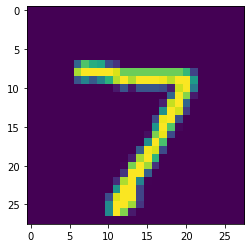

7

In [142]:
import numpy as np
import matplotlib.pyplot as plt
print(x_test[:5].shape)
print(x_test[:5][0].shape)
d = x_test[:5][0]
plt.imshow(d)
plt.show()  
predictions = probability_model.predict(x_test[:5])
np.argmax(predictions[0])

(192, 195)
(28, 28)
(1, 28, 28)


2

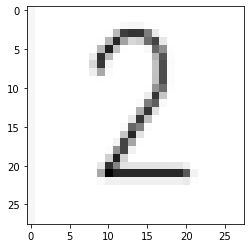

In [150]:
import skimage.io as io
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
imagen = io.imread(fname="imagenes/nro2.png",as_gray=True)
print(imagen.shape)
image_resized = resize(imagen, (28, 28), anti_aliasing=True)
print(image_resized.shape)
x_t = image_resized.reshape(1,28, 28)
print(x_t.shape)
plt.imshow(x_t[:1][0] , cmap=plt.get_cmap('gray_r'))
predictions = probability_model.predict(x_t)
np.argmax(predictions[0])